<a href="https://colab.research.google.com/github/zjefersound/ai-unoesc/blob/main/trabalho_final_ia_agente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from PIL import Image
import os

In [ ]:
# Função para carregar imagens como vetores
def load_images_from_folder(folder, label, flatten=False, size=(128, 128)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        path = os.path.join(folder, filename)
        try:
            img = Image.open(path).convert("RGB").resize(size)
            img_array = (np.asarray(img).flatten() if flatten else np.asarray(img)) / 255.0
            images.append(img_array)
            labels.append(label)
        except:
            continue
    return images, labels


In [ ]:
# Carregando imagens
real_imgs, real_labels = load_images_from_folder("dataset/real", label=0)
print(len(real_imgs))

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3442: DecompressionBombWarning: Image size (143040000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3442: DecompressionBombWarning: Image size (121554000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


1998


In [ ]:
fake_imgs, fake_labels = load_images_from_folder("dataset/fake", label=1)
print(len(fake_imgs))

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


2000


In [ ]:

X = np.array(real_imgs + fake_imgs)
y = np.array(real_labels + fake_labels)

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [ ]:
# Treinamento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp.fit(X_train_scaled, y_train)

# Avaliação
y_pred = mlp.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.65      0.63       302
           1       0.62      0.58      0.60       298

    accuracy                           0.61       600
   macro avg       0.62      0.61      0.61       600
weighted avg       0.62      0.61      0.61       600

[[196 106]
 [125 173]]


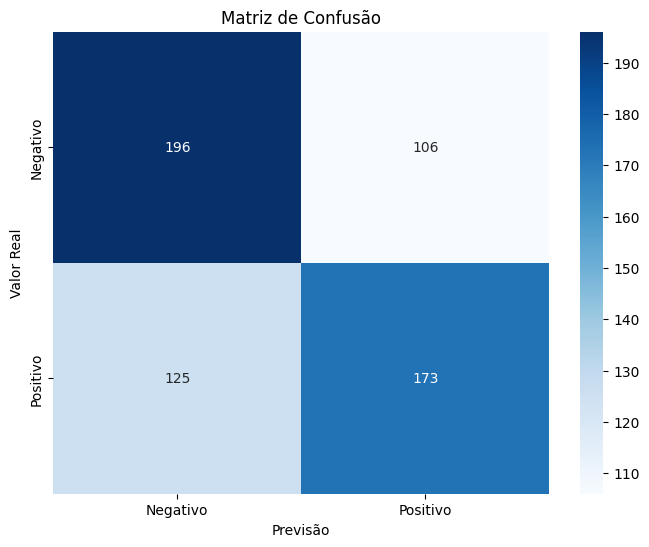

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
xticklabels=['Negativo', 'Positivo'],
yticklabels=['Negativo', 'Positivo'])
plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [ ]:
# Garantir que y esteja no formato correto
y_train_cat = to_categorical(y_train, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)

# Definindo o modelo CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # Saída com 2 classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Treinamento
history = model.fit(
    X_train, y_train_cat,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

# Avaliação no conjunto de teste
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)
print(f"Acurácia no teste: {test_accuracy:.2f}")


Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.5577 - loss: 0.6916 - val_accuracy: 0.5500 - val_loss: 0.6822
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.6541 - loss: 0.6253 - val_accuracy: 0.6768 - val_loss: 0.6095
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.7145 - loss: 0.5675 - val_accuracy: 0.6643 - val_loss: 0.6122
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.7163 - loss: 0.5565 - val_accuracy: 0.6679 - val_loss: 0.6219
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.7306 - loss: 0.5177 - val_accuracy: 0.7143 - val_loss: 0.5881
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.7629 - loss: 0.4836 - val_accuracy: 0.7161 - val_loss: 0.5811
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.8052 - loss: 0.4211 - val_accuracy: 0.7071 - val_loss: 0.6222
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.8490 - loss: 0.3427 - val_accuracy: 0.7018 - val_loss:

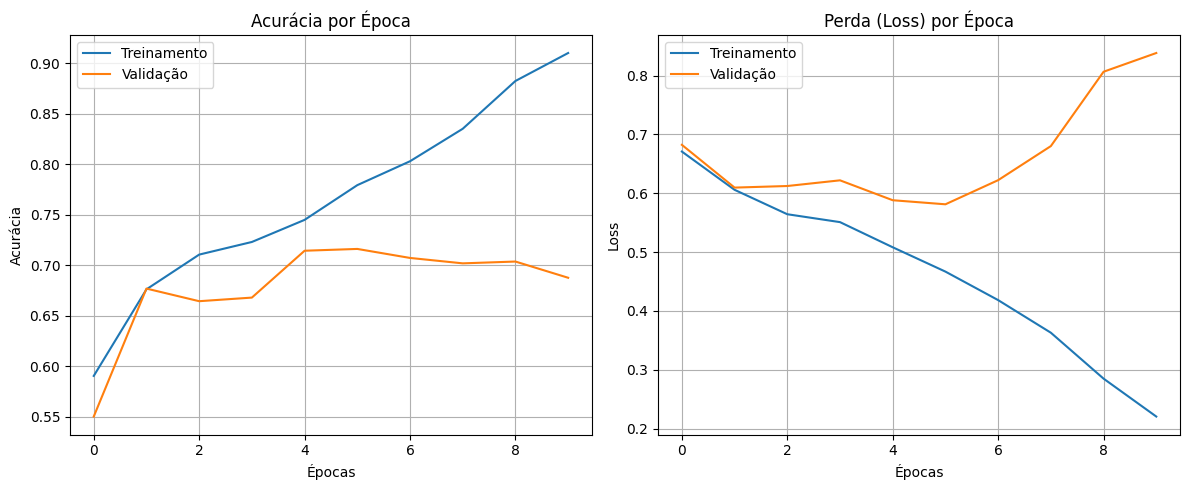

In [ ]:
import matplotlib.pyplot as plt

# Acurácia
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia por Época')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)

# Perda
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Perda (Loss) por Época')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 249ms/step
              precision    recall  f1-score   support

        Real       0.66      0.71      0.69       617
        Fake       0.67      0.61      0.64       583

    accuracy                           0.66      1200
   macro avg       0.66      0.66      0.66      1200
weighted avg       0.66      0.66      0.66      1200



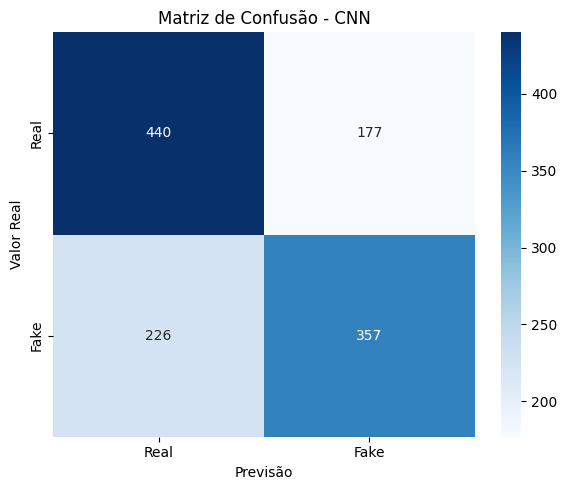

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Previsões no conjunto de teste
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # Classe com maior probabilidade
y_true = np.argmax(y_test_cat, axis=1)  # Se você usou to_categorical

# Relatório de classificação
print(classification_report(y_true, y_pred_classes, target_names=["Real", "Fake"]))

# Matriz de confusão
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Real", "Fake"],
            yticklabels=["Real", "Fake"])
plt.xlabel("Previsão")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusão - CNN")
plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Carregando a base MobileNetV2 sem o topo (camadas finais)
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,  # remove as camadas de classificação originais
    input_shape=(128, 128, 3)
)
base_model.trainable = False  # Congela os pesos da base

# Construindo o modelo sobre o backbone
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
output = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Compilando
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Treinamento
history = model.fit(
    X_train, y_train_cat,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 50s 596ms/step - accuracy: 0.5313 - loss: 0.9382 - val_accuracy: 0.6982 - val_loss: 0.5661
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 79s 552ms/step - accuracy: 0.6686 - loss: 0.6541 - val_accuracy: 0.7589 - val_loss: 0.4905
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 41s 557ms/step - accuracy: 0.7462 - loss: 0.5301 - val_accuracy: 0.7768 - val_loss: 0.4595
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 41s 581ms/step - accuracy: 0.7725 - loss: 0.4982 - val_accuracy: 0.7946 - val_loss: 0.4413
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 39s 567ms/step - accuracy: 0.8035 - loss: 0.4457 - val_accuracy: 0.7893 - val_loss: 0.4298
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 40s 568ms/step - accuracy: 0.8243 - loss: 0.4134 - val_accuracy: 0.7964 - val_loss: 0.4307
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 37s 525ms/step - accuracy: 0.8219 - loss: 0.3825 - val_accuracy: 0.7929 - val_loss: 0.4178
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 44s 568ms/

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)
print(f"Acurácia no teste: {test_accuracy:.2f}")

38/38 ━━━━━━━━━━━━━━━━━━━━ 15s 405ms/step - accuracy: 0.8220 - loss: 0.3776
Acurácia no teste: 0.82


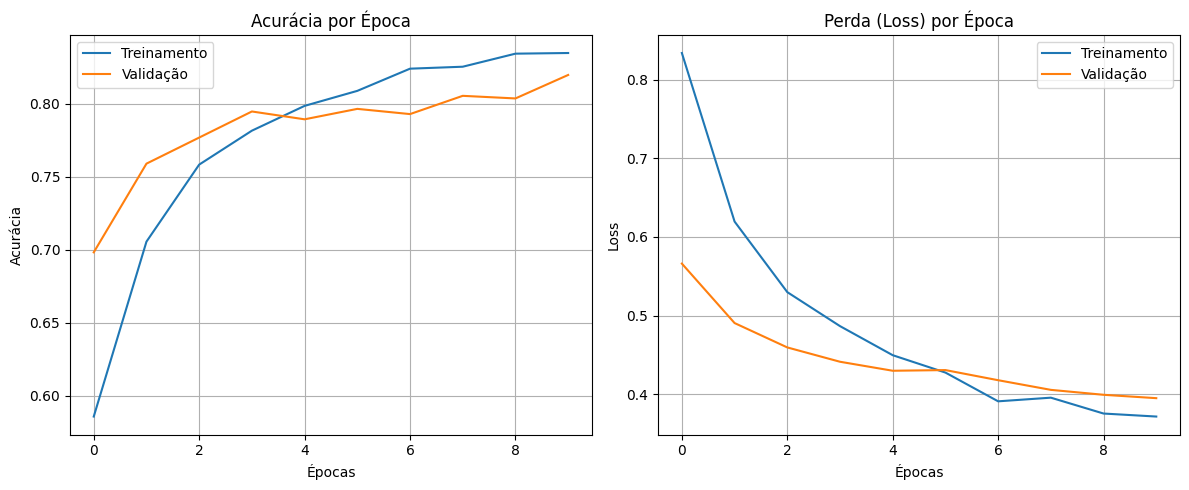

In [ ]:
import matplotlib.pyplot as plt

# Acurácia
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia por Época')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)

# Perda
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Perda (Loss) por Época')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


38/38 ━━━━━━━━━━━━━━━━━━━━ 20s 478ms/step
              precision    recall  f1-score   support

        Real       0.82      0.82      0.82       617
        Fake       0.81      0.82      0.81       583

    accuracy                           0.82      1200
   macro avg       0.82      0.82      0.82      1200
weighted avg       0.82      0.82      0.82      1200



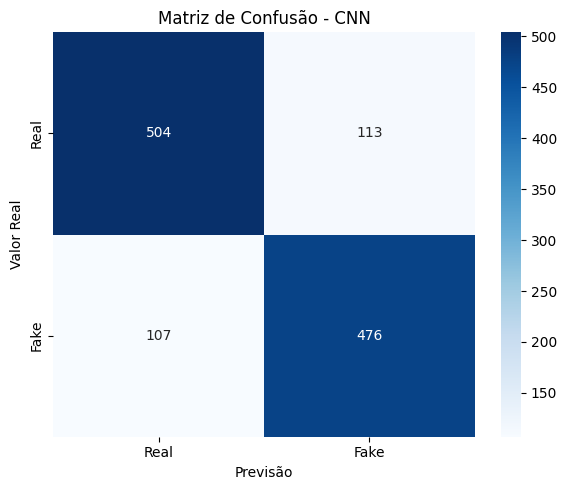

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Previsões no conjunto de teste
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # Classe com maior probabilidade
y_true = np.argmax(y_test_cat, axis=1)  # Se você usou to_categorical

# Relatório de classificação
print(classification_report(y_true, y_pred_classes, target_names=["Real", "Fake"]))

# Matriz de confusão
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Real", "Fake"],
            yticklabels=["Real", "Fake"])
plt.xlabel("Previsão")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusão - CNN")
plt.tight_layout()
plt.show()

In [ ]:
# 1. Descongela as últimas camadas da MobileNetV2
base_model.trainable = True

# 2. Opcional: descongelar só a partir de uma camada específica
for layer in base_model.layers[:-60]:  # Descongela só as últimas 30 camadas
    layer.trainable = False

# 3. Recompila com taxa de aprendizado menor
model.compile(
    optimizer=Adam(learning_rate=1e-5),  # Mais baixa!
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 4. Treinamento com fine-tuning
history_finetune = model.fit(
    X_train, y_train_cat,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)


Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 66s 733ms/step - accuracy: 0.9036 - loss: 0.2196 - val_accuracy: 0.8536 - val_loss: 0.4072
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 67s 964ms/step - accuracy: 0.9141 - loss: 0.2129 - val_accuracy: 0.8464 - val_loss: 0.4089
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 53s 763ms/step - accuracy: 0.9245 - loss: 0.1842 - val_accuracy: 0.8446 - val_loss: 0.4065
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 79s 725ms/step - accuracy: 0.9139 - loss: 0.2124 - val_accuracy: 0.8500 - val_loss: 0.4046
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 52s 751ms/step - accuracy: 0.9337 - loss: 0.1730 - val_accuracy: 0.8554 - val_loss: 0.4008
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 52s 749ms/step - accuracy: 0.9401 - loss: 0.1528 - val_accuracy: 0.8464 - val_loss: 0.3955
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 50s 716ms/step - accuracy: 0.9472 - loss: 0.1402 - val_accuracy: 0.8500 - val_loss: 0.3959
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 53s 753ms/step - accuracy: 0.9461 - loss: 0.1432 - val_accu

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)
print(f"Acurácia no teste: {test_accuracy:.2f}")

38/38 ━━━━━━━━━━━━━━━━━━━━ 15s 402ms/step - accuracy: 0.8618 - loss: 0.3498
Acurácia no teste: 0.86


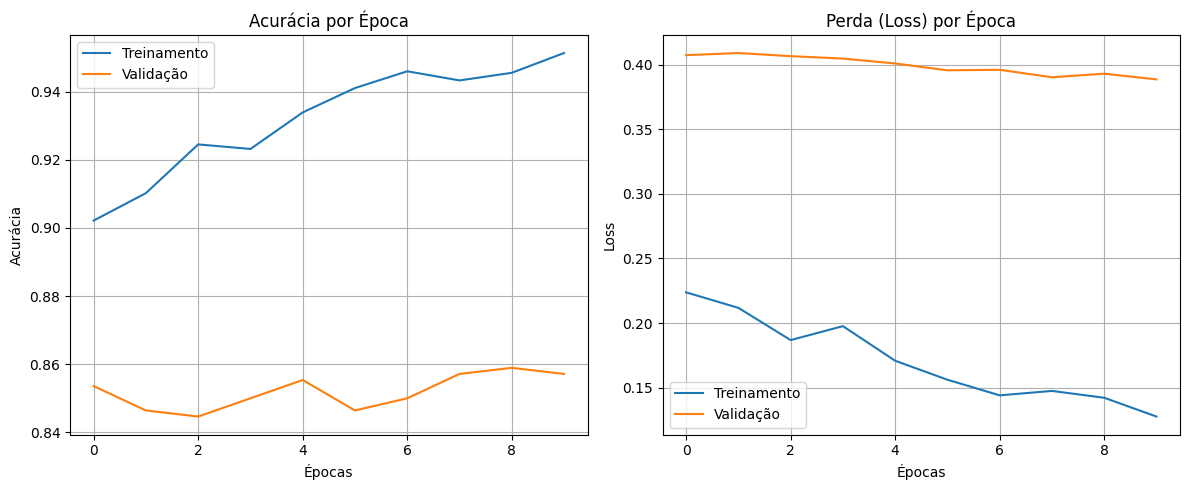

In [ ]:
import matplotlib.pyplot as plt

# Acurácia
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_finetune.history['accuracy'], label='Treinamento')
plt.plot(history_finetune.history['val_accuracy'], label='Validação')
plt.title('Acurácia por Época')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)

# Perda
plt.subplot(1, 2, 2)
plt.plot(history_finetune.history['loss'], label='Treinamento')
plt.plot(history_finetune.history['val_loss'], label='Validação')
plt.title('Perda (Loss) por Época')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


38/38 ━━━━━━━━━━━━━━━━━━━━ 19s 450ms/step
              precision    recall  f1-score   support

        Real       0.85      0.89      0.87       617
        Fake       0.88      0.83      0.85       583

    accuracy                           0.86      1200
   macro avg       0.86      0.86      0.86      1200
weighted avg       0.86      0.86      0.86      1200



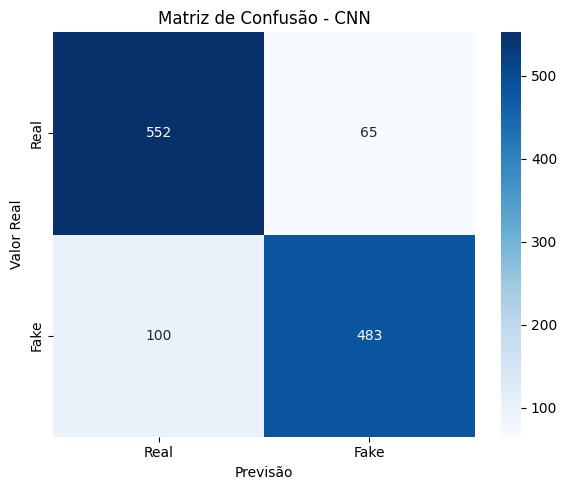

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Previsões no conjunto de teste
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # Classe com maior probabilidade
y_true = np.argmax(y_test_cat, axis=1)  # Se você usou to_categorical

# Relatório de classificação
print(classification_report(y_true, y_pred_classes, target_names=["Real", "Fake"]))

# Matriz de confusão
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Real", "Fake"],
            yticklabels=["Real", "Fake"])
plt.xlabel("Previsão")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusão - CNN")
plt.tight_layout()
plt.show()